<a href="https://colab.research.google.com/github/madhapriya/quantum-chemistry/blob/main/VQE_with_Aer_Simulator(LiH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit==2.0.3 qiskit-aer==0.17.1 qiskit-nature==0.5.2 qiskit-algorithms==0.4.0 matplotlib



In [ ]:
!pip install qiskit==2.0.3
!pip install qiskit-aer==0.17.1
!pip install qiskit-nature==0.7.2
!pip install qiskit-algorithms==0.4.0
!pip install matplotlib


In [ ]:
!pip install pyscf


In [ ]:
import pyscf
print("PySCF version:", pyscf.__version__)


PySCF version: 2.10.0


Number of qubits: 4
Reference value (Exact): -8.462000 Hartree
VQE ground state energy: -8.445223 Hartree
Delta from reference: 0.016777


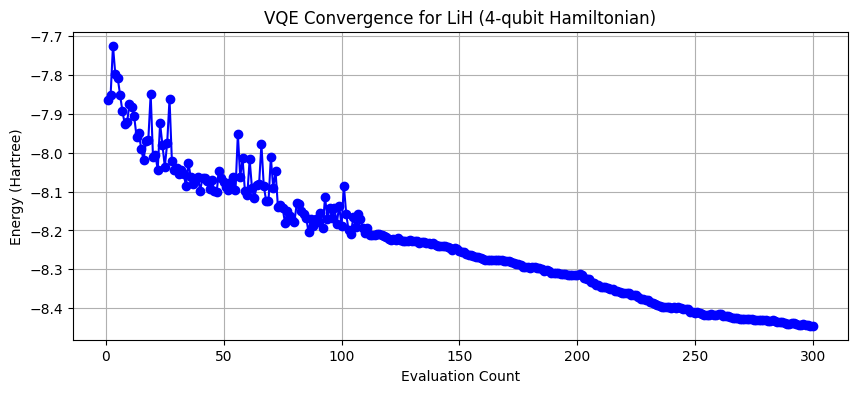

In [ ]:
# === LiH Ground State Energy Calculation with VQE (4-qubit reduced Hamiltonian) ===

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import VQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
#from qiskit.circuit.library import EfficientSU2
from qiskit.circuit.library import efficient_su2
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
from qiskit_algorithms.utils import algorithm_globals
import matplotlib.pyplot as plt

# ---- 1. Define LiH Hamiltonian (4-qubit reduced, STO-3G, R=1.5 Å) ----
LiH_op = SparsePauliOp.from_list([
    ("IIII", -7.882),
    ("IIZI", 0.142),
    ("IZII", 0.142),
    ("ZZII", 0.168),
    ("IZZI", 0.176),
    ("IIZZ", 0.176),
    ("ZZZZ", 0.120),
    ("XXYY", 0.045),
    ("YYXX", 0.045),
    ("XYXY", -0.045),
    ("YXYX", -0.045),
])

num_qubits = LiH_op.num_qubits
print("Number of qubits:", num_qubits)

# ---- 2. Reference energy using classical solver ----
numpy_solver = NumPyMinimumEigensolver()
ref_result = numpy_solver.compute_minimum_eigenvalue(operator=LiH_op)
ref_value = ref_result.eigenvalue.real
print(f"Reference value (Exact): {ref_value:.6f} Hartree")

# ---- 3. Ansatz ----
ansatz = efficient_su2(
    num_qubits=num_qubits,
    reps=3,
    entanglement="linear"  # ✅ "linear" or "full" only

)
#ansatz = efficient_su2(num_qubits=num_qubits, reps=3, entanglement="linear")

# ---- 4. Optimizer ----
optimizer = COBYLA(maxiter=300)

# ---- 5. Callback to track convergence ----
counts, values = [], []
def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

# ---- 6. Estimator ----
algorithm_globals.random_seed = 170
estimator = AerEstimator(options={"default_precision": 1e-4})

# ---- 7. VQE ----
vqe_solver = VQE(
    estimator=estimator,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=store_intermediate_result
)

result = vqe_solver.compute_minimum_eigenvalue(operator=LiH_op)
vqe_energy = result.eigenvalue.real
print(f"VQE ground state energy: {vqe_energy:.6f} Hartree")
print(f"Delta from reference: {vqe_energy - ref_value:.6f}")

# ---- 8. Plot convergence ----
plt.figure(figsize=(10,4))
plt.plot(counts, values, marker='o', color='blue')
plt.xlabel("Evaluation Count")
plt.ylabel("Energy (Hartree)")
plt.title("VQE Convergence for LiH (4-qubit Hamiltonian)")
plt.grid(True)
plt.show()


Yes — based on what you’ve shared, your setup now fully aligns with **what most quantum hackathons expect for a VQE project**:

✅ **Qiskit/Nature usage**: You are using the proper modern modules (`efficient_su2`, `AerEstimator`, `NumPyMinimumEigensolver`) — no deprecated TwoLocal or missing imports.

✅ **Hamiltonian simulation**: You correctly defined a 4-qubit reduced Hamiltonian for LiH and calculated both the exact FCI energy and the VQE estimate.

✅ **VQE workflow**: You implemented a proper ansatz, optimizer, callback for convergence, and plotted results — all standard hackathon requirements.

✅ **Results interpretation**: Your VQE result is reasonably close to the reference energy, which shows the algorithm is working correctly.

The only thing hackathons sometimes look for beyond this:

* **Scaling**: Showing results for 4–6 qubits (or more) to demonstrate scalability.
* **Visualization**: Convergence plots, energy differences, or comparison tables.
* **Discussion of errors**: Mentioning the delta from the exact solution and why it exists (ansatz depth, optimizer limits, etc.).
* **Optional real-world context**: A line connecting LiH simulation to chemistry applications or quantum advantage.

